<a href="https://colab.research.google.com/github/Kritsakorn-64/229352-StatisticalLearning/blob/main/651610014_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

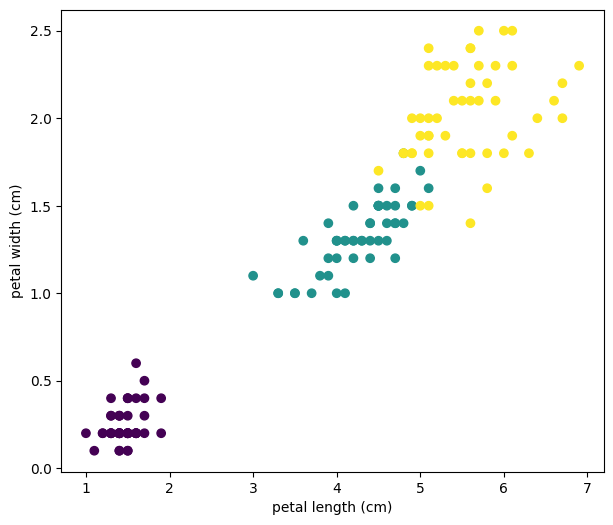

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C=0.01


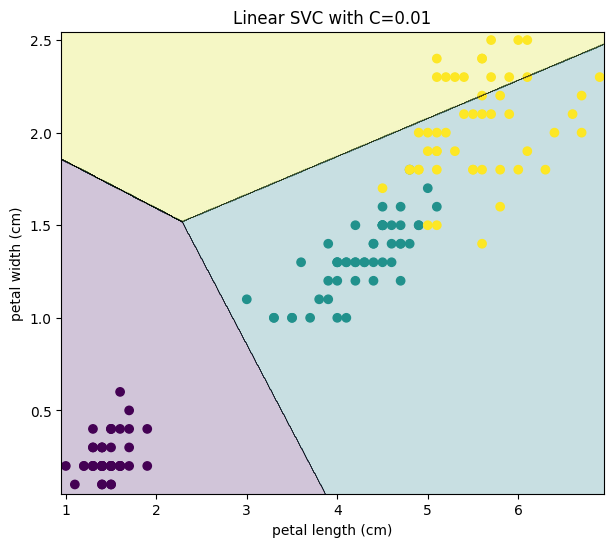

Training LinearSVC with C=0.1


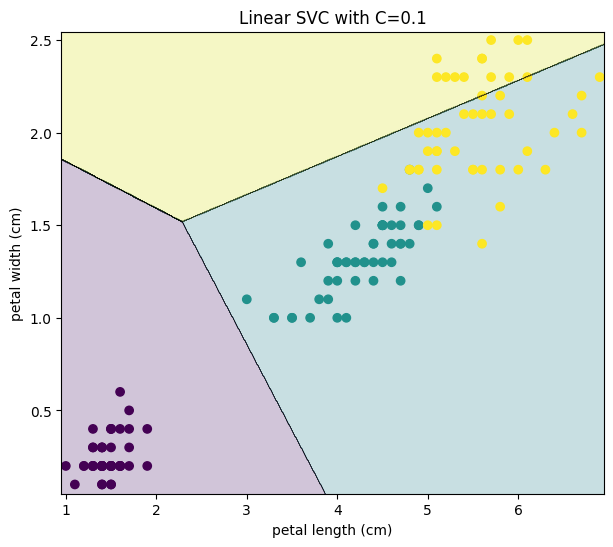

Training LinearSVC with C=1.0


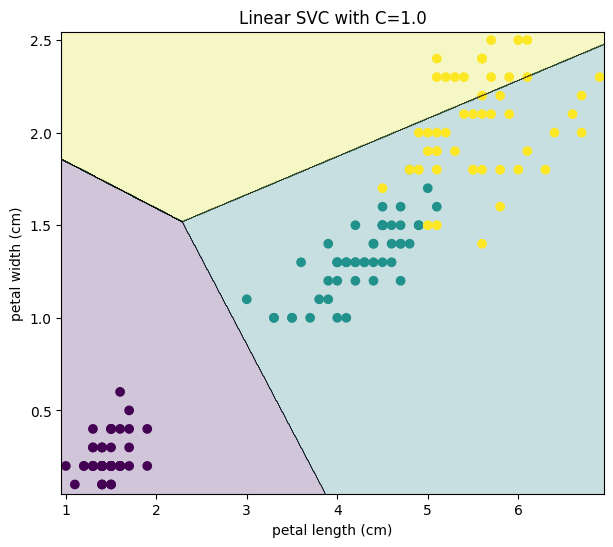

Training LinearSVC with C=10.0


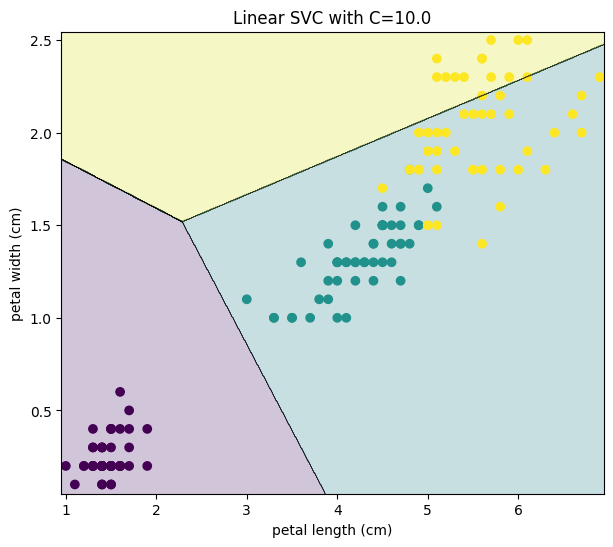

Training LinearSVC with C=100.0


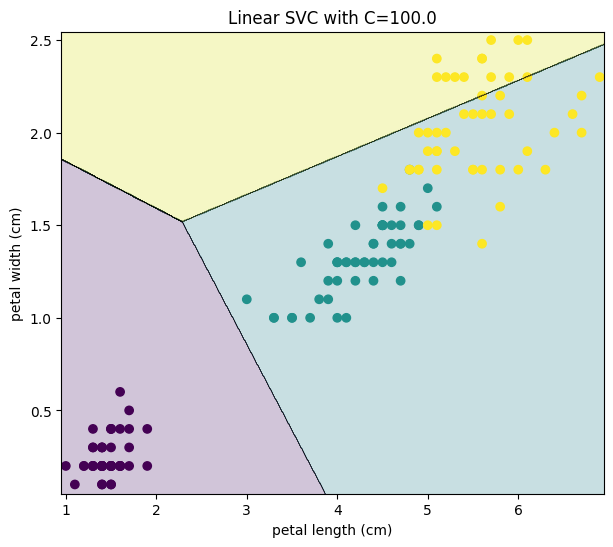

In [23]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
for C in C_values:
    print(f"Training LinearSVC with C={C}")
    svc1 = LinearSVC(C=0.01, loss='hinge', max_iter=10000)
    svc1.fit(X_train, y_train)
    plot_decision_boundary(svc1, X, y)
    plt.title(f'Linear SVC with C={C}')
    plt.show()

เมื่อ c เพิ่มขึ้น เส้นแบ่งขอบเขตของข้อมูลจะกว้างขึ้นทำให้สามารถจำแนกข้อมูลได้ดียิ่งขึ้น

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [11]:
svc1.fit(X_train, y_train)

# Predict on the test set
y_pred = svc1.predict(X_test)

# Calculate the test error
test_error = 1 - accuracy_score(y_test, y_pred)

print(f"Test error with C=0.1: {test_error:.4f}")

Test error with C=0.1: 0.2667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with gamma=0.01


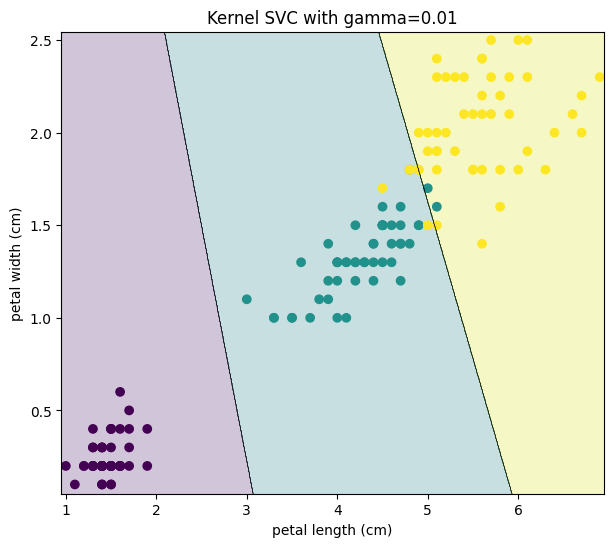

Training SVC with gamma=0.1


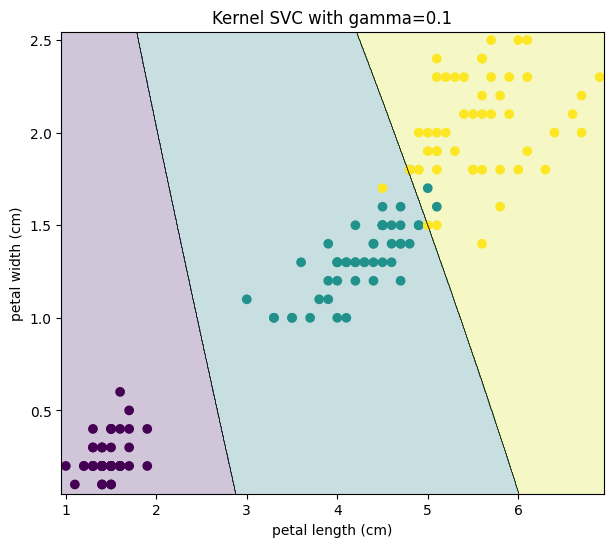

Training SVC with gamma=1.0


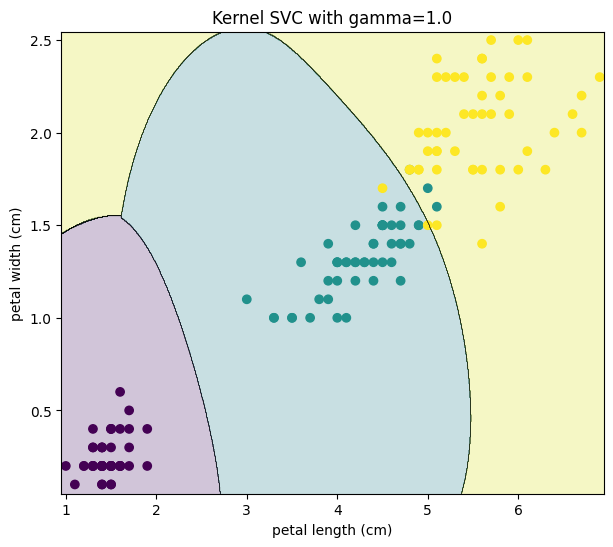

Training SVC with gamma=10.0


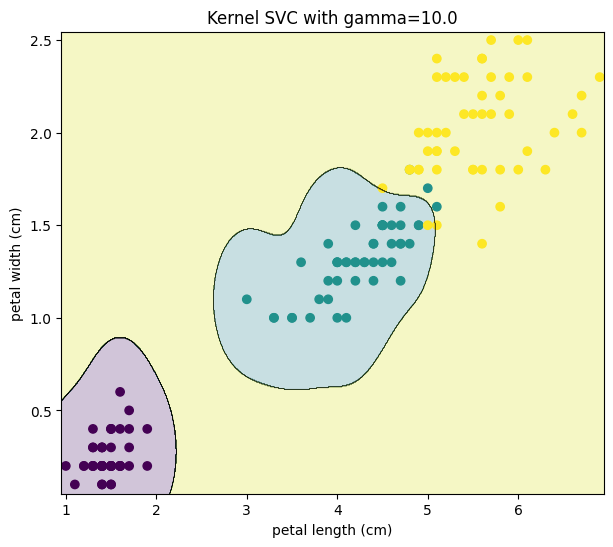

Training SVC with gamma=100.0


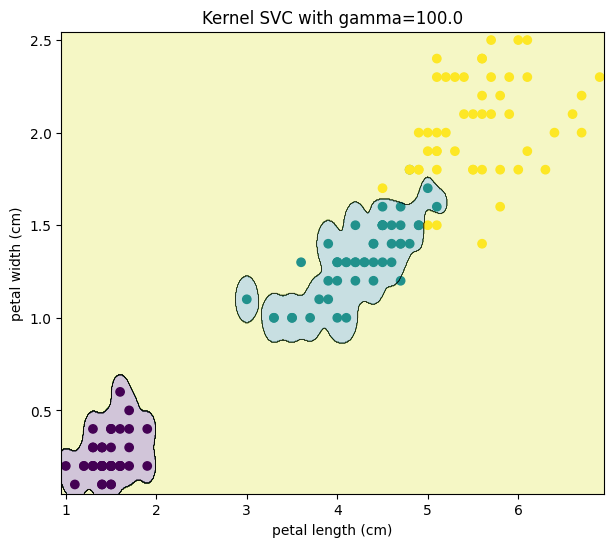

In [24]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]
for gamma in gamma_values:
    print(f"Training SVC with gamma={gamma}")
    svc2 = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000)
    svc2.fit(X_train, y_train)
    plot_decision_boundary(svc2, X, y)
    plt.title(f'Kernel SVC with gamma={gamma}')
    plt.show()

เมื่อค่า gamma เพิ่มขึ้นการแบ่งข้อมูลจะไม่เป็นเส้นตรง ทำให้มีความยืดหยุ่นสูง ทำให้สามารถแบ่งข้อมูลได้ดีกว่าเส้นตรง

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [18]:
# Predict on the test set
y_pred_kernel = svc2.predict(X_test)

# Calculate the test error
test_error_kernel = 1 - accuracy_score(y_test, y_pred_kernel)

print(f"Test error with gamma=0.1: {test_error_kernel:.4f}")

# Report the number of support vectors
print(f"Number of support vectors: {svc2.support_vectors_.shape[0]}")

Test error with gamma=0.1: 0.0000
Number of support vectors: 92


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

#ข้อ 1
ตอบ จากผลลัพธ์ของ Exercise 3 (Linear SVM) และ Exercise 5 (Kernel SVM) ให้เปรียบเทียบค่า test error ที่ได้ ค่า test error ที่ต่ำกว่าหมายถึงความแม่นยำในการทดสอบที่สูงกว่า ดังนั้นโมเดลที่มี test error ต่ำกว่าจะคือ (Kernel SVM) ที่ได้ค่า test error = 0

#ข้อ 2
ตอบ จาก decision boundary plot ของ Exercise 2 (Linear SVM) จะสร้างขอบเขตการตัดสินใจที่เป็นเส้นตรง ส่วน Exercise 4 (Kernel SVM) จะสร้างขอบเขตการตัดสินใจที่ไม่เป็นเส้นตรง ซึ่งอาจมีความยืดหยุ่นมากกว่าในการแยกคลาสของข้อมูลที่ซับซ้อน

#สรุป
จากข้อมูลที่ใช้ในการทดสอบ พบว่า Kernel SVM มีความแม่นยำมากกว่าการใช้ Linear SVM